This notebook illustrates some of the `cosmo` methods.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from quickspec import cosmo

In [36]:
sns.set_style('whitegrid')

# Initialization

We initiate our cosmology with the current best-fit values for the cosmological parameters.

In [8]:
mylcdm = cosmo.lcdm(
    omr=0.0,
    omb=0.049,
    omc=0.265,
    oml=0.686,
    H0=67.3)

# Properties

We then quickly inspect the properties associated with the `lcdm` class that encapsules the standard $\Lambda\rm CDM$ cosmology.

In [14]:
vars(mylcdm).keys()

dict_keys(['omr', 'omb', 'omc', 'oml', 'H0', 'h', 'omm', 'zvec', 'xvec', 'zmin', 'zmax', 'xmin', 'xmax', 'spl_x_z', 'spl_z_x'])

Aside from the already set values, `zvec` and `xvec` denote distances as redshift and comoving distance, respectively.

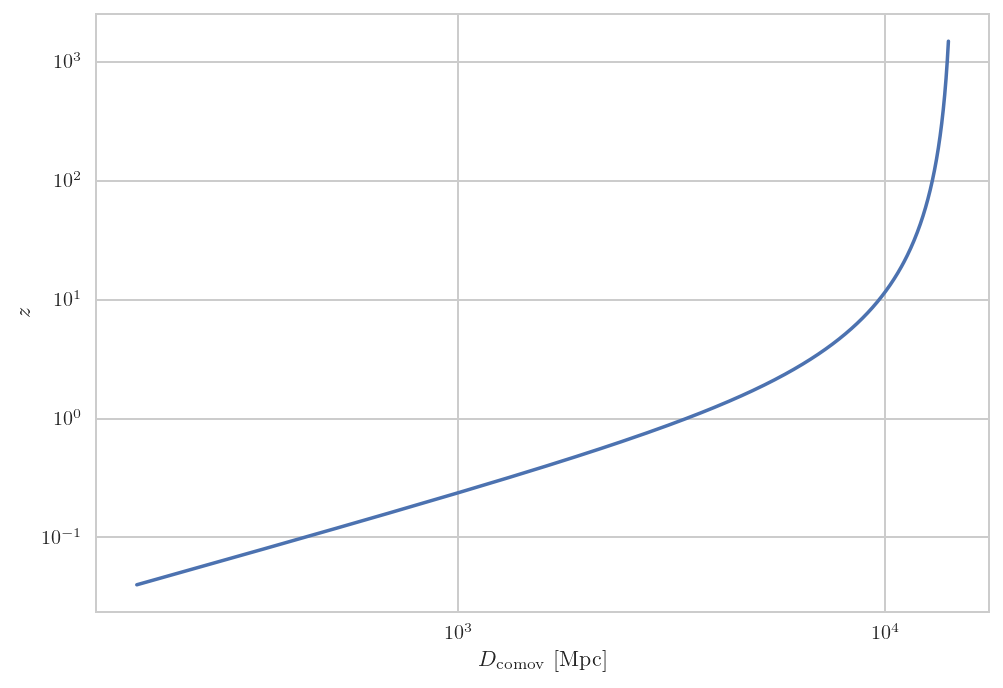

In [39]:
plt.loglog(mylcdm.xvec, mylcdm.zvec)
plt.xlabel(r'$D_{\rm comov}\ [\rm Mpc]$')
plt.ylabel(r'$z$');

Another useful information is the scale factor `a` at $\Lambda$-matter equity:

In [40]:
mylcdm.aeq_lm()

0.7706701017299415

# Conversions

We can easily convert time since the Big Bang `t` (in Gyr), the redshift `z` and the comoving distance `x` (in Mpc) into each other:

In [46]:
print(mylcdm.t_z(0))  # Now
print(mylcdm.t_z(1.e9))  # Very close to the Big Bang

13.813124932001326
5.287100036310245e-13


We can also get the value of the Hubble parameters $H$ as a function of $z$, $x$, or $a$:

In [48]:
print(mylcdm.H_a(1.), mylcdm.H_a(0.5))

67.3 120.352272185


In [51]:
print(mylcdm.H_z(0.5), mylcdm.H_z(100))

88.9213586125 38279.1609131


In [55]:
print(mylcdm.H_x(1.e3), mylcdm.H_x(1.e4))

76.2069051613 1717.78925841


Lastly we can determine the growth factor:

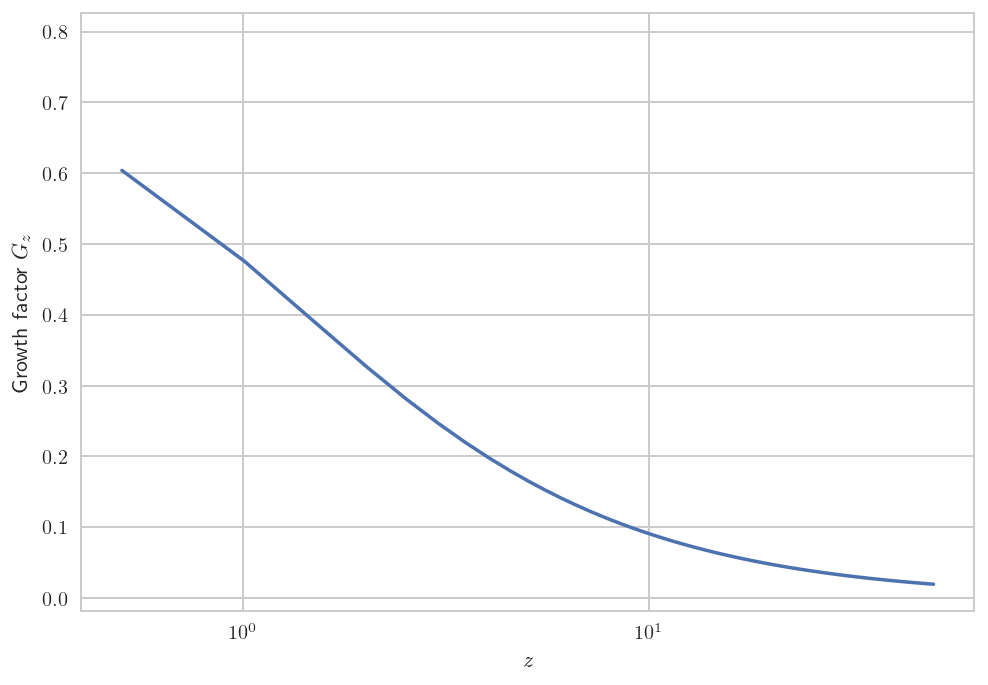

In [59]:
zs = np.linspace(0, 50, 100)
plt.semilogx(zs, mylcdm.G_z(zs))
plt.xlabel(r'$z$');
plt.ylabel(r'Growth factor $G_z$');